<a href="https://colab.research.google.com/github/Anubhav4989/InternSavy_Internship_Tasks/blob/main/Anubhav_Kumar_Tiwary_InternSavy_Internship_Data_Science_Intern_Task%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 3: Customer Segmentation Analysis
with Python.

Dataset link: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

# **The Art of Customer Segmentation with Python**

In [39]:
# Import necessary libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [40]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Mall_Customers.csv")

In [42]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [44]:
df.shape

(200, 5)

In [45]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [46]:
x = df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

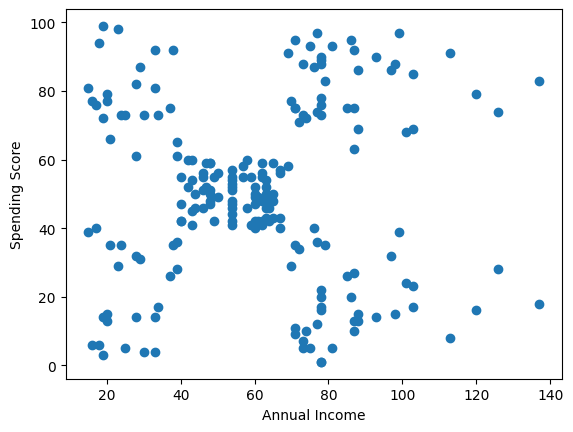

In [47]:
plt.scatter(x[...,0],x[...,1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [48]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

In [49]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30259.65720728547,
 25095.70320999756,
 21830.041978049434,
 20736.679938924128]

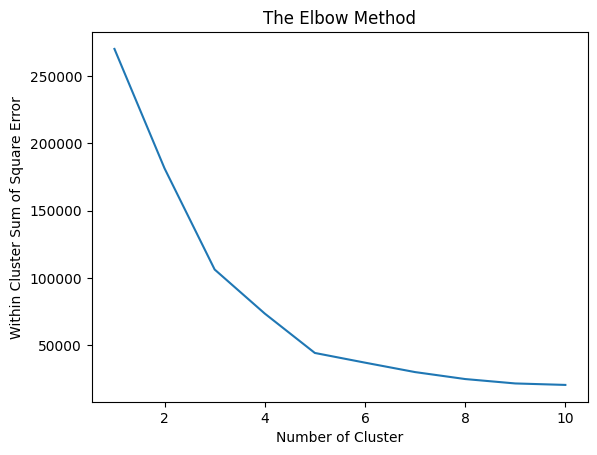

In [50]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Within Cluster Sum of Square Error')
plt.show()

In [51]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [52]:
x[y_kmeans==0,0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137])

In [53]:
x[y_kmeans==0,1]

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18])

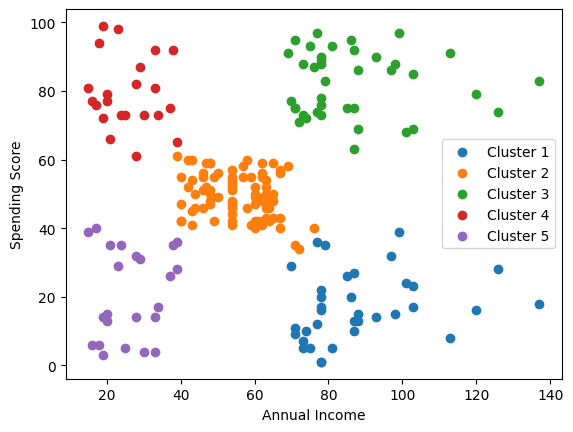

In [54]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],label='Cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],label='Cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],label='Cluster 5')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [55]:
df['Target'] = y_kmeans

In [56]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0
